<a href="https://colab.research.google.com/github/Mahmoudsabry3/scripts/blob/main/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import os
import zipfile
import requests 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Plus** **for zip files**



In [4]:

'''url_for_the_zipped_file = '/content/drive/MyDrive/Colab Notebooks/random files/BankChurners.csv.zip'
distantion = "/content/drive/MyDrive/Colab Ncotebooks/random files/"
    '''

'url_for_the_zipped_file = \'/content/drive/MyDrive/Colab Notebooks/random files/BankChurners.csv.zip\'\ndistantion = "/content/drive/MyDrive/Colab Ncotebooks/random files/"\n    '

In [5]:

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/random files/Profit optimiser excel.xlsx')

In [6]:
df.head()

,Date,US30(Open),US30(High),US30(Low),US30(Close),Indicator 1,Indicator 2,"Buy/Sell (0=buy, 1 = sell)",Buy/Sell Price,Profit,Loss
0,2021-02-19 16:10:00,31476.65,31496.15,31471.65,31482.60,31484.836667,31489.902,0,31541.65,NaN,NaN
1,2021-02-19 16:05:00,31495.26,31501.94,31465.29,31476.65,31489.186667,31501.712,0,31541.65,-45.50,-70.00
2,2021-02-19 16:00:00,31495.65,31508.31,31483.48,31495.26,31496.753333,31514.062,0,31541.65,-39.71,-76.36
3,2021-02-19 15:55:00,31499.35,31504.40,31474.91,31495.65,31512.216667,31531.680,0,31541.65,-33.34,-58.17
4,2021-02-19 15:50:00,31541.65,31545.29,31496.08,31499.35,31526.466667,31544.564,0,31541.65,-37.25,-66.74


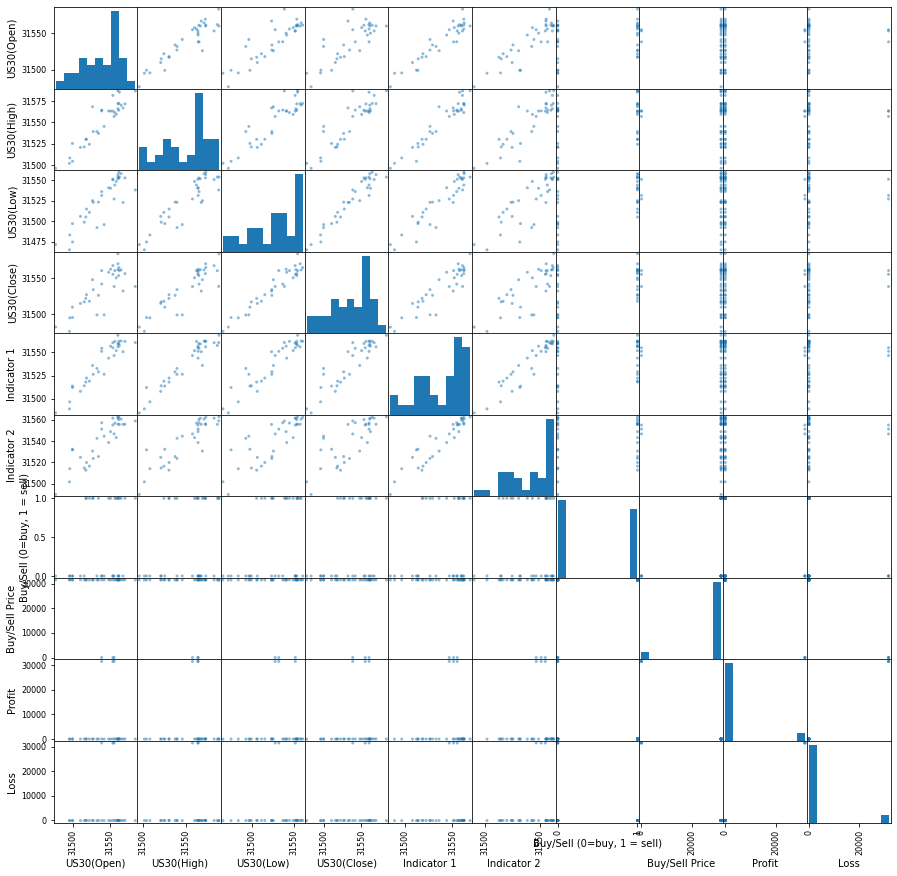

In [7]:
# ratio of fig size around 2x of columns nums
scatter_matrix(df,figsize = (15,15));

*zooming in for spcific column*




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


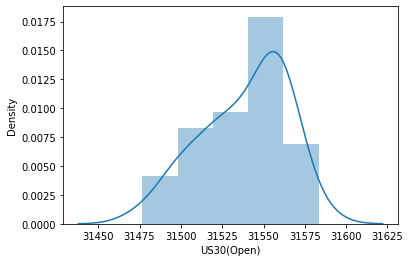

In [8]:
sns.distplot(df['US30(Open)'],kde=True);

In [9]:
dfmod=df.describe().T.loc[:,['mean','std','min','max']]

In [10]:
median = df.median()
length = df.isna().sum() + df.count()
miss_val= df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [11]:
df2 = pd.concat([median,length,miss_val], axis=1,ignore_index= False)

In [12]:
df_final = pd.concat([dfmod,df2], axis=1,ignore_index= False,names=['sdds','dsddsds','0dds','dssdsds','sdkklks','sdsdsd'])

In [13]:
df_final.rename(columns= {0:'median',1:'length',2:'miss.val'},inplace=True)

In [15]:
df_final

,mean,std,min,max,median,length,miss.val
US30(Open),31538.483529,26.129706,31476.650000,31583.350000,31544.6500,34,0
US30(High),31550.342941,26.006988,31496.150000,31587.240000,31562.3450,34,0
US30(Low),31525.431471,27.814855,31465.290000,31560.030000,31529.4800,34,0
US30(Close),31536.402647,27.681010,31476.650000,31583.350000,31540.0250,34,0
Indicator 1,31538.508284,23.625093,31484.836667,31568.483333,31548.7125,34,0
Indicator 2,31540.352324,19.925732,31489.902000,31562.710000,31545.6045,34,0
"Buy/Sell (0=buy, 1 = sell)",0.470588,0.506640,0.000000,1.000000,0.0000,34,0
Buy/Sell Price,28758.212941,9080.816263,0.000000,31569.520000,31541.6500,34,0
Profit,2860.365152,9217.686234,-45.500000,31571.980000,-3.2800,34,1
Loss,2835.057879,9217.652031,-76.360000,31557.070000,-41.3200,34,1


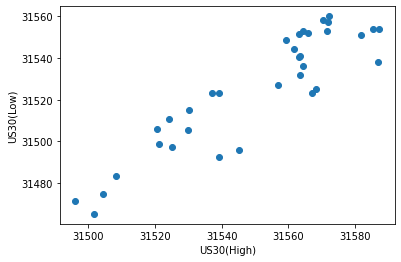

In [36]:
plt.scatter(x = df['US30(High)'],y = df['US30(Low)']);
plt.xlabel('US30(High)')
plt.ylabel('US30(Low)')
plt.show()

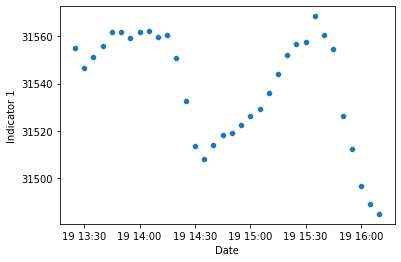

In [37]:
fig,ax = plt.subplots(nrows=1,ncols=1 )
sns.scatterplot(x ='Date',y='Indicator 1',data=df);

In [38]:
corr

,US30(Open),US30(High),US30(Low),US30(Close),Indicator 1,Indicator 2,"Buy/Sell (0=buy, 1 = sell)",Buy/Sell Price,Profit,Loss
US30(Open),1.000000,0.926811,0.879198,0.805420,0.943862,0.890555,0.320198,-0.125368,0.114632,0.114473
US30(High),0.926811,1.000000,0.908194,0.892644,0.955407,0.893472,0.332425,-0.131590,0.121347,0.121119
US30(Low),0.879198,0.908194,1.000000,0.961914,0.933990,0.827937,0.399463,-0.128341,0.118657,0.118665
US30(Close),0.805420,0.892644,0.961914,1.000000,0.910860,0.792263,0.413152,-0.168201,0.160929,0.160943
Indicator 1,0.943862,0.955407,0.933990,0.910860,1.000000,0.944074,0.293300,-0.165734,0.159017,0.158857
Indicator 2,0.890555,0.893472,0.827937,0.792263,0.944074,1.000000,0.058830,-0.167049,0.161547,0.161294
"Buy/Sell (0=buy, 1 = sell)",0.320198,0.332425,0.399463,0.413152,0.293300,0.058830,1.000000,0.292459,-0.306249,-0.305944
Buy/Sell Price,-0.125368,-0.131590,-0.128341,-0.168201,-0.165734,-0.167049,0.292459,1.000000,-0.999994,-0.999993
Profit,0.114632,0.121347,0.118657,0.160929,0.159017,0.161547,-0.306249,-0.999994,1.000000,0.999999
Loss,0.114473,0.121119,0.118665,0.160943,0.158857,0.161294,-0.305944,-0.999993,0.999999,1.000000


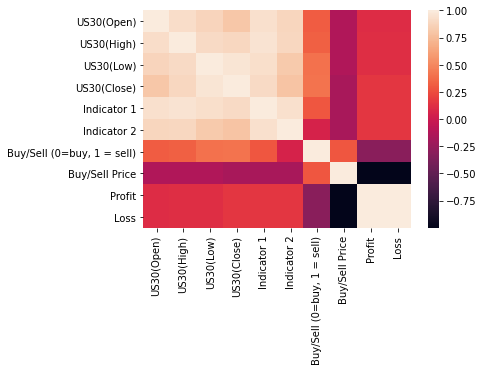

In [44]:
corr = df.corr()
sns.heatmap(corr);

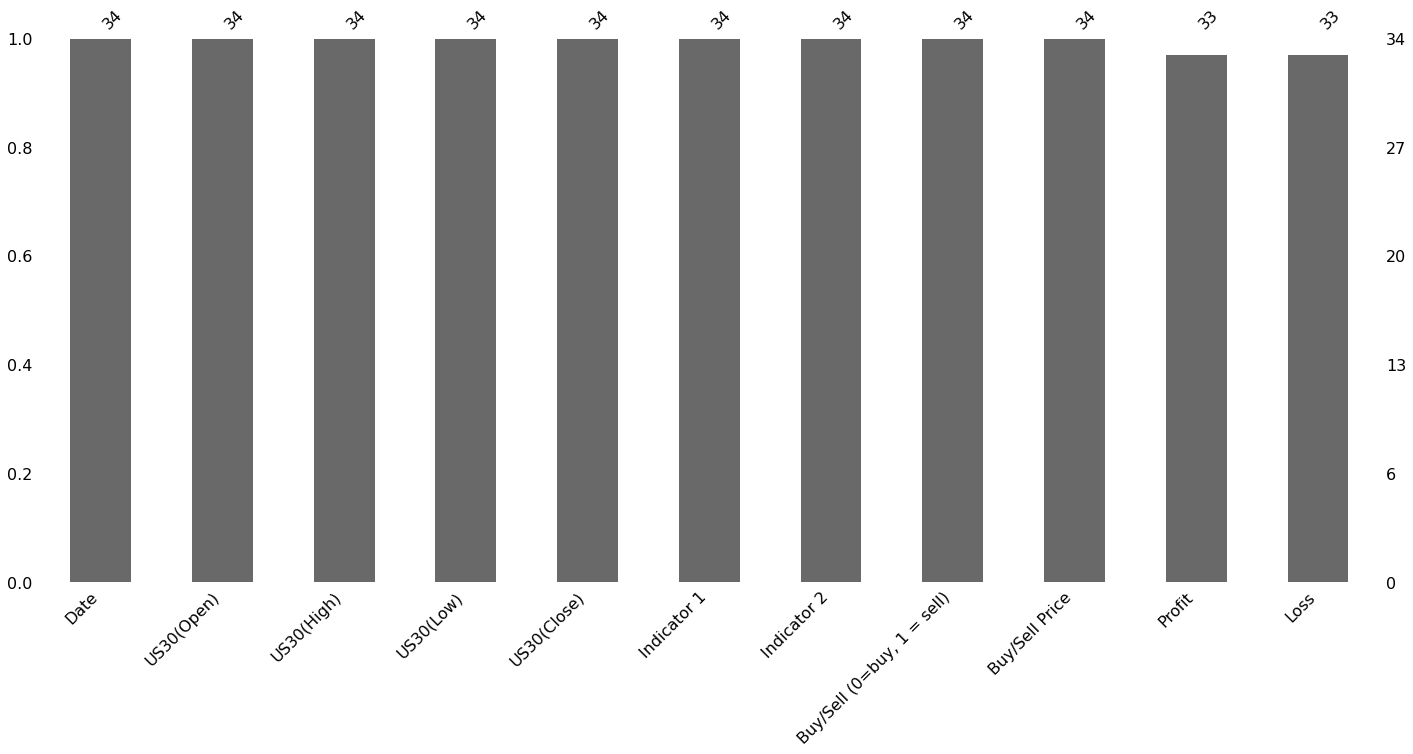

In [45]:
msno.bar(df);

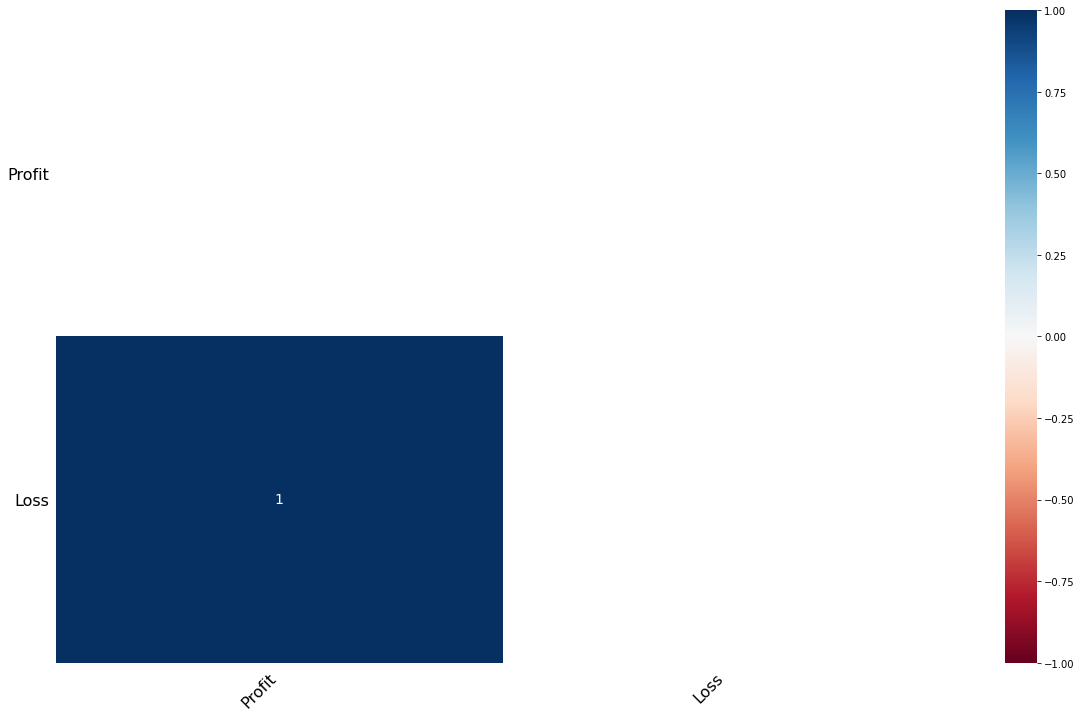

In [46]:
msno.heatmap(df);